In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [2]:
path = './../../data/cifar-100'
all_csvs = glob.glob(os.path.join(path, "*.csv"))

csvs = []
for file in all_csvs:
    df = pd.read_csv(file, index_col=0, header=0)
    df['filename'] = os.path.basename(file)
    csvs.append(df)

data = pd.concat(csvs, axis=0, ignore_index=True)
data.sample(5).head()

,id,truth,annotation,time,volunteer,ts,ordering,batch_i,filename
342,oak_tree_s_002043.png,trees,trees,0.589297,Cierra,1.578279e+09,epsilon_random,14,annotations_cierra.csv
988,golden_hamster_s_000669.png,small_mammals,small_mammals,16.421956,MarinaT_try2,1.578287e+09,random,2,annotations_marina.csv
2556,spider_s_001003.png,non-insect_invertebrates,non-insect_invertebrates,6.277715,Vinith,1.578290e+09,random,1,annotations_vinith.csv
1764,lapin_s_000007.png,small_mammals,small_mammals,6.203504,MarinaT_try2,1.578290e+09,same,80,annotations_marina.csv
1598,pine_tree_s_000021.png,trees,trees,0.664493,MarinaT_try2,1.578290e+09,same,63,annotations_marina.csv


In [3]:
print(f'# of csvs: {len(all_csvs)}')
print(f'# of volunteers: {len(data["volunteer"].unique())}')
print(f'# of images labelled: {len(data)}')

# of csvs: 12
# of volunteers: 13
# of images labelled: 2656


In [4]:
display(data.sort_values('time', ascending=False).head(10))

print(f"Pre outlier removal  >>> mean: {data['time'].mean()} std: {data['time'].std()}")

time_outliers = data[data['time'] > 60].index
print(f'Dropping {len(time_outliers)} records with times greater than 60 seconds as outliers.')
data.drop(time_outliers, inplace=True)

print(f"Post outlier removal >>> mean: {data['time'].mean()} std: {data['time'].std()}")
print(f"{len(data)} records remain.")

,id,truth,annotation,time,volunteer,ts,ordering,batch_i,filename
106,mount_s_000023.png,large_natural_outdoor_scenes,large_natural_outdoor_scenes,1100.114067,Arnold,1.578283e+09,random,1,annotations_arnold.csv
583,ballistic_missile_s_001041.png,vehicles_2,large_man-made_outdoor_things,128.202596,Gabi,1.578331e+09,random,13,annotations_gabi.csv
2632,american_lobster_s_000017.png,non-insect_invertebrates,large_man-made_outdoor_things,85.256591,Vinith,1.578290e+09,random,9,annotations_vinith.csv
2568,raccoon_s_000392.png,medium_mammals,medium_mammals,69.688050,Vinith,1.578290e+09,epsilon_random,2,annotations_vinith.csv
2551,pear_s_001426.png,fruit_and_vegetables,household_furniture,50.152802,Vinith,1.578290e+09,random,1,annotations_vinith.csv
458,panthera_pardus_s_000438.png,large_carnivores,trees,47.428894,Gabi,1.578330e+09,random,4,annotations_gabi.csv
2002,guitarfish_s_000687.png,fish,insects,46.604968,Marta,1.578281e+09,same,1,annotations_marta.csv
363,intercontinental_ballistic_missile_s_000321.png,vehicles_2,large_natural_outdoor_scenes,46.037594,Donna,1.578272e+09,random,1,annotations_donna.csv
2167,fin_whale_s_000028.png,aquatic_mammals,large_natural_outdoor_scenes,43.830402,sana,1.578328e+09,random,6,annotations_sana.csv
908,porcupine_s_001302.png,medium_mammals,small_mammals,42.825510,MarinaT,1.578265e+09,random,6,annotations_marina.csv


Pre outlier removal  >>> mean: 5.550919038983402 std: 22.340960876475226
Dropping 4 records with times greater than 60 seconds as outliers.
Post outlier removal >>> mean: 5.037699722337195 std: 6.168839683787336
2652 records remain.


In [5]:
data.groupby(['filename','volunteer']).count()

id  truth  annotation  time    ts  \
filename                 volunteer                                           
annotations_angeline.csv Angeline       106    106         106   106   106   
annotations_arnold.csv   Arnold          99     99          99    99    99   
annotations_cierra.csv   Cierra         152    152         152   152   152   
annotations_donna.csv    Donna          100    100         100   100   100   
annotations_gabi.csv     Gabi           126    126         126   126   126   
annotations_lauren.csv   Lauren         287    287         287   287   287   
annotations_marina.csv   MarinaT        100    100         100   100   100   
                         MarinaT_try2  1030   1030        1030  1030  1030   
annotations_marta.csv    Marta          106    106         106   106   106   
annotations_sana.csv     sana           120    120         120   120   120   
annotations_savannah.csv Savannah       200    200         200   200   200   
annotations_taylor.csv   Taylor K       123    123         123   123   123   
annotations_vinith.csv   Vinith         103    103         103   103   103   

                                       ordering  batch_i  
filename                 volunteer                        
annotations_angeline.csv Angeline           106      106  
annotations_arnold.csv   Arnold              99       99  
annotations_cierra.csv   Cierra             152      152  
annotations_donna.csv    Donna              100      100  
annotations_gabi.csv     Gabi               126      126  
annotations_lauren.csv   Lauren             287      287  
annotations_marina.csv   MarinaT            100      100  
                         MarinaT_try2      1030     1030  
annotations_marta.csv    Marta              106      106  
annotations_sana.csv     sana               120      120  
annotations_savannah.csv Savannah           200      200  
annotations_taylor.csv   Taylor K           123      123  
annotations_vinith.csv   Vinith             103      103

In [6]:
# Distribution of batches on orderings
display(data.groupby('ordering').count())
display(data.groupby('ordering').count()/len(data))

,id,truth,annotation,time,volunteer,ts,batch_i,filename
ordering,,,,,,,,
epsilon_random,779,779,779,779,779,779,779,779
random,1025,1025,1025,1025,1025,1025,1025,1025
same,848,848,848,848,848,848,848,848


,id,truth,annotation,time,volunteer,ts,batch_i,filename
ordering,,,,,,,,
epsilon_random,0.293741,0.293741,0.293741,0.293741,0.293741,0.293741,0.293741,0.293741
random,0.386501,0.386501,0.386501,0.386501,0.386501,0.386501,0.386501,0.386501
same,0.319759,0.319759,0.319759,0.319759,0.319759,0.319759,0.319759,0.319759


In [7]:
data['correct'] = np.where(data['annotation'] == data['truth'], 1, 0)
print(f' Overall % correct: {data["correct"].sum()/len(data)*100}')
print(f' Overall average time: {data["time"].sum()/len(data)}')

 Overall % correct: 73.3785822021116
 Overall average time: 5.037699722337195


In [8]:
mean_by_ordering = data.groupby(["ordering"],as_index=False)["time","correct"].mean().sort_values('time')
mean_by_ordering

,ordering,time,correct
2,same,3.295267,0.798349
0,epsilon_random,4.762211,0.741977
1,random,6.688615,0.674146


In [9]:
std_by_ordering = data.groupby(["ordering"])['time'].std().reset_index().reindex(mean_by_ordering.index)
std_by_ordering

,ordering,time
2,same,4.589922
0,epsilon_random,5.442486
1,random,7.299828


[(0, 1.1), (0, 15)]

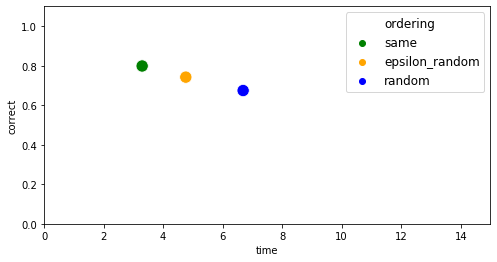

In [10]:
plt.figure(figsize=(8,4))
plot_colors_orderings = {'random': 'blue', 'epsilon_random': 'orange', 'same': 'green'}
ax = sns.scatterplot(data=mean_by_ordering,
                     x="time",
                     y="correct",
                     hue='ordering',
                     palette=plot_colors_orderings,
                     s=150)
plt.legend(fontsize='large')
ax.set(xlim=(0,15),
      ylim=(0,1.1))

In [11]:
mean_by_ordering_volunteer = data.groupby(['ordering', 'volunteer'],as_index=False)[['time', 'correct']].mean()
mean_by_ordering_volunteer

,ordering,volunteer,time,correct
0,epsilon_random,Angeline,7.470991,0.700000
1,epsilon_random,Arnold,4.570685,0.800000
2,epsilon_random,Cierra,4.391925,0.833333
3,epsilon_random,Gabi,3.630357,0.720000
4,epsilon_random,Lauren,2.105607,0.763889
5,epsilon_random,MarinaT_try2,4.790977,0.717241
6,epsilon_random,Marta,5.264598,0.966667
7,epsilon_random,Savannah,5.453575,0.633333
8,epsilon_random,Taylor K,6.235531,0.697674
9,epsilon_random,Vinith,6.510377,0.703704


[(0, 1.1), (0, 15)]

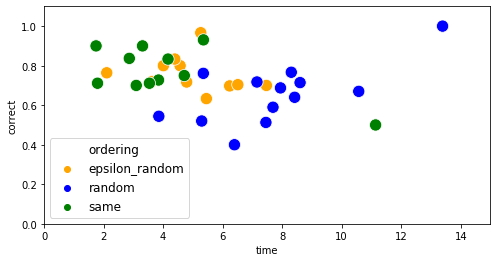

In [12]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(data=mean_by_ordering_volunteer,
                     x="time",
                     y="correct",
                     hue='ordering',
                     palette=plot_colors_orderings,
                     s=150)
plt.legend(fontsize='large')
ax.set(xlim=(0,15),
      ylim=(0,1.1))

,volunteer,batch_i
7,MarinaT_try2,104
5,Lauren,29
9,Savannah,20
2,Cierra,16
4,Gabi,13
10,Taylor K,13
3,Donna,12
6,MarinaT,12
12,sana,12
0,Angeline,11


,ordering,batch_i,time,correct
105,same,18,1.536937,0.90
117,same,46,1.186343,1.00
47,random,5,9.283270,0.55


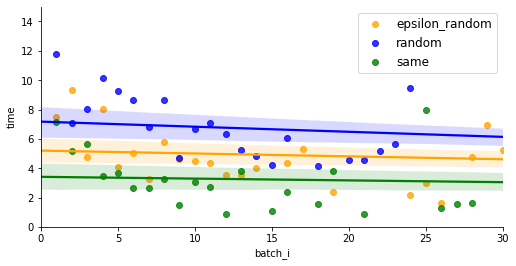

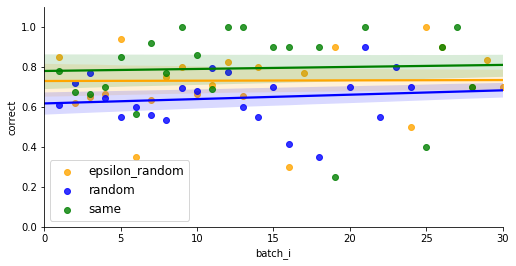

In [13]:
max_batch = data.groupby(['volunteer'], as_index=False)[['batch_i']].max()
display(max_batch.sort_values('batch_i', ascending=False))
mean_by_ordering_batch_i = data.groupby(['ordering','batch_i'],as_index=False)[['time', 'correct']].mean()
display(mean_by_ordering_batch_i.sample(3))

ax = sns.lmplot(data=mean_by_ordering_batch_i,
                x="batch_i",
                y="time",
                hue='ordering',
                palette=plot_colors_orderings,
                legend_out=False,
                height=3.8,
                aspect=1.9)

plt.legend(fontsize='large')
ax.set(xlim=(0,30),
      ylim=(0,15))

ax = sns.lmplot(data=mean_by_ordering_batch_i,
                x="batch_i",
                y="correct",
                hue='ordering',
                palette=plot_colors_orderings,
                legend_out=False,
                height=3.8,
                aspect=1.9)

plt.legend(fontsize='large')
ax.set(xlim=(0,30),
      ylim=(0,1.1))